In [3]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import explained_variance

import os
from os import path

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D

# Import Data

In [4]:
ica_data = load_json_model('../data/processed_data/abaum_ica_data.json')

In [5]:
ica_data.imodulon_table

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,explained variance,n_genes,Function,Category,Evidence,Name
Fur-1,Fur,1.501639e-20,7.508194e-20,0.365854,0.348837,0.357143,15.0,43.0,41.0,1.0,0.007520,41,Iron homeostasis,Inorganic ions,Fisher's exact test,Fur-1
NDH-1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015195,9,NADPH dehyrogenase I operon,Energy metabolism,E.coli PRECISE2.0 iModulome comparison,NDH-1
BfmR-BfmS,BfmR-BfmS,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,6.0,6.0,6.0,1.0,0.002411,6,Two-component system regulating the pili chape...,Virulence,Fisher's exact test,BfmR-BfmS
PhoR-PhoB,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004925,20,Two-component system regulating inorganic phos...,Inorganic ions,E.coli PRECISE2.0 iModulome comparison,PhoR-PhoB
Fur-2,Fur,3.853864e-26,1.541546e-25,0.365385,0.441860,0.400000,19.0,43.0,52.0,1.0,0.020674,52,Iron homeostasis,Inorganic ions,"Fisher's exact test, E.coli PRECISE2.0 iModulo...",Fur-2
Pnt,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004305,3,Pnt operon encoding subunits of NADP transhydr...,Energy metabolism,Manual annotation,Pnt
GigA-GigB KO,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001633,2,Single gene iModulon capturing gigA and gigB k...,Genomic,Manual annotation,GigA-GigB KO
Cbl/GigC,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016704,27,Sulfur transport and cysteine metabolism,Inorganic ions,Manual annotation,Cbl/GigC
R7 mutant,AbaM,5.680000e-08,5.680000e-08,0.169492,0.142857,0.155039,10.0,70.0,59.0,1.0,0.011960,59,iModulon capturing the loss of the p1AB5075 pl...,Plasmid,Manual annotation,R7 mutant
ABUW_1645,ABUW_1645,2.987707e-16,0.000000e+00,0.583333,0.120690,0.200000,14.0,116.0,24.0,1.0,0.032379,24,Key regulator of the VIR-O/AV-T high frequency...,Virulence,Manual annotation,ABUW_1645


p1AB5075 associated iModulons:
- R7 mutant
- HGT
- p1AB5075


<AxesSubplot:xlabel='Gene Start', ylabel='R7 mutant Gene Weight'>

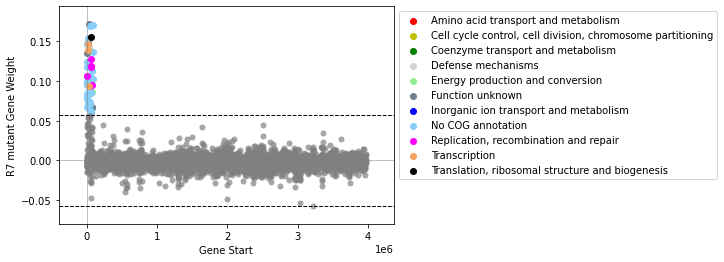

In [17]:
plot_gene_weights(ica_data,'R7 mutant')

<AxesSubplot:xlabel='Gene Start', ylabel='HGT Gene Weight'>

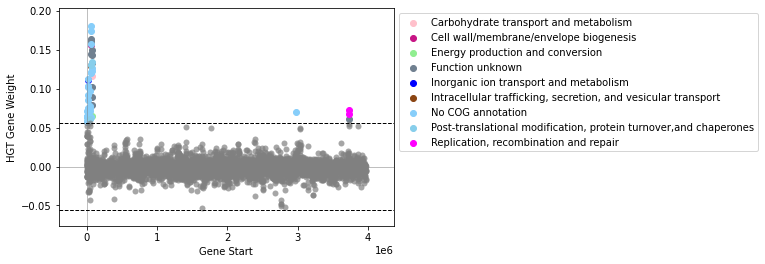

In [18]:
plot_gene_weights(ica_data,'HGT')

<AxesSubplot:xlabel='Gene Start', ylabel='AMR Gene Weight'>

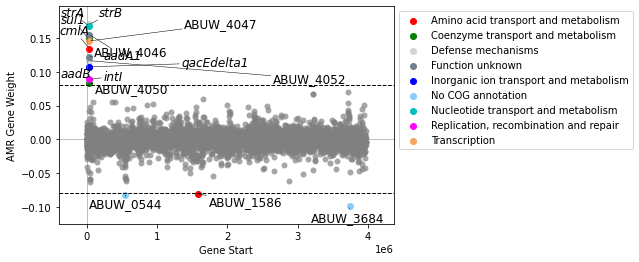

In [19]:
plot_gene_weights(ica_data,'AMR')

R7-mutant-1 may contains the entire plasmid (capturing the effect of p1AB5075 loss in the R7 mutant sample) 
while R7 mutant-2 contains non-antibiotic resistance island genes and p1AB5075 contains the genes on the antibiotic resistance island.

# Comparing iModulon Activities in R7 mutants

([], [])

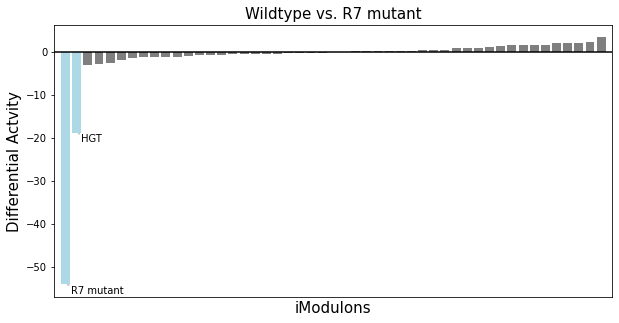

In [22]:
from adjustText import adjust_text
from pymodulon.util import dima

base_condition = "mutants:WT"
diff_condition = "mutants:R7"
threshold = 5

table = dima(ica_data,base_condition,diff_condition,threshold=threshold)

fig,ax = plt.subplots(figsize=[10,5])
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["full_name"]==diff_condition].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()

labels=[]
width = 0
bars = plt.bar(activity_data.index,activity_data)

# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,len(activity_data)):
    if activity_data.index[i] in table.index:
        if "SG" in activity_data.index[i]:
            ax.bar(activity_data.index[i],activity_data[i],color="tab:grey")
        elif abs(activity_data[i]) < 10:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
        else:
            ax.bar(activity_data.index[i],activity_data[i],color="lightblue")
            labels.append(ax.text(width, activity_data[i],
                                  activity_data.index[i],fontsize=10))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1

adjust_text(labels,ax=ax, add_objects= bars, 
            arrowprops=dict(arrowstyle="-",color="gray",lw=1,alpha=.8,zorder=0))

ax.plot([-1,49],[0,0],color="black")
ax.set_xlim([-1,49])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("Differential Actvity",fontsize=15)
ax.set_title("Wildtype vs. R7 mutant",fontsize=15)
    
plt.xticks([])
#plt.savefig("../figures/Figure6_R7_DIMA.svg",transparent=True)

In [23]:
activity_data

R7 mutant                -54.029157
HGT                      -18.789030
ABUW_1645 OE              -3.081072
Type IV Pili              -2.672740
AMR                       -2.630513
KpdD-KpdE                 -1.725766
Pnt                       -1.320798
Unc-1                     -1.210975
Unc-8                     -1.197497
Unc-11                    -1.195218
Unc-4                     -1.187212
Unc-6                     -0.913973
mumR                      -0.740793
BfmR-BfmS                 -0.716824
NDH-1                     -0.629602
adeB KO                   -0.467208
Heavy metal resistance    -0.441245
Unc-10                    -0.432101
GigA-GigB KO              -0.336569
Translation               -0.325797
Unc-9                     -0.251990
GacA-GacS                 -0.195459
LldR                      -0.088198
CRISPR                    -0.084949
Fur-2                      0.017493
GigA-GigB                  0.018318
Cbl/GigC                   0.190401
Motility                   0

<AxesSubplot:ylabel='AMR iModulon\nActivity'>

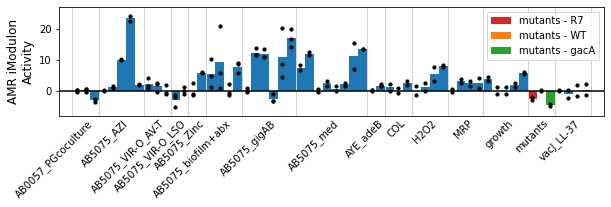

In [24]:
plot_activities(ica_data, 'AMR', highlight='mutants')

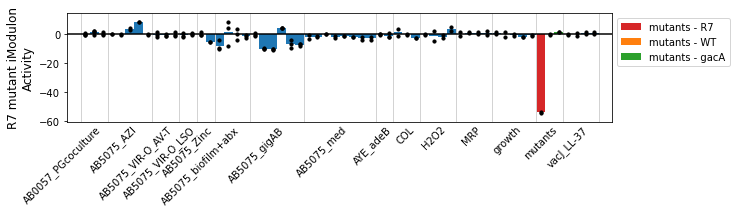

In [16]:
plot_activities(ica_data, 'R7 mutant', highlight ='mutants')
#plt.savefig("../figures/SuppFigure5a.svg",transparent=True)

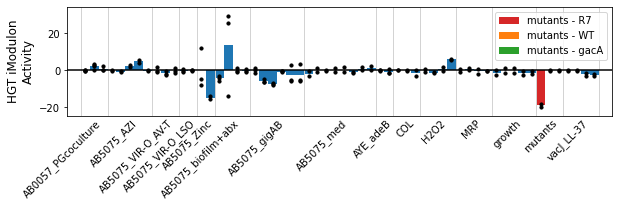

In [17]:
plot_activities(ica_data, 'HGT', highlight='mutants')
#plt.savefig("../figures/SuppFigure5b.svg",transparent=True)

Activity of the three iModulons in the R7 mutant recapitulates the previous assessment. R7-1 and R7-2 activities
are significantly decreased but p1AB5075 activity is not in the R7 mutant strain, suggesting that transcriptional regulation of the antibiotic resisance island is seperarate from that of the rest of the plasmid. 

# Looking more closely at p1AB5075 iModulon 

In [32]:
ica_data.view_imodulon('R7 mutant')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_4004,0.097800,ABUW_4004,NaN,2572,3837,+,hypothetical protein,Function unknown,NaN,NaN
ABUW_4005,0.123837,ABUW_4005,NaN,3803,4327,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4006,0.146295,ABUW_4006,NaN,4373,4753,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4007,0.083390,ABUW_4007,NaN,4890,5282,+,hypothetical protein,No COG annotation,NaN,AbaM
ABUW_4008,0.067280,ABUW_4008,NaN,5454,6050,+,hypothetical protein,No COG annotation,NaN,AbaM
ABUW_4009,0.077501,ABUW_4009,NaN,6056,6247,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4010,0.106062,ABUW_4010,NaN,6270,6410,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4011,0.079448,ABUW_4011,NaN,6469,6684,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4012,0.106864,ABUW_4012,NaN,6689,7165,+,Thermonuclease protein,"Replication, recombination and repair",NaN,AbaM
ABUW_4013,0.136005,ABUW_4013,NaN,7210,7557,+,Putative DNA binding protein,Function unknown,NaN,NaN


In [33]:
ica_data.view_imodulon('HGT')

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator
ABUW_2965,0.069698,ABUW_2965,NaN,2978751,2978951,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_3676,0.060818,tniC,NaN,3733480,3734400,-,transposition helper protein C,Function unknown,NaN,NaN
ABUW_3677,0.067940,tniB,NaN,3734405,3736315,-,transposition protein B,"Replication, recombination and repair",NaN,NaN
ABUW_3678,0.071992,tniA,NaN,3736316,3737026,-,transposase protein A,"Replication, recombination and repair",NaN,NaN
ABUW_4002,0.058784,ABUW_4002,NaN,1248,1487,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4003,0.056578,ABUW_4003,NaN,1474,2556,+,Zeta toxin family protein,Function unknown,NaN,NaN
ABUW_4007,0.063563,ABUW_4007,NaN,4890,5282,+,hypothetical protein,No COG annotation,NaN,AbaM
ABUW_4008,0.071819,ABUW_4008,NaN,5454,6050,+,hypothetical protein,No COG annotation,NaN,AbaM
ABUW_4009,0.065278,ABUW_4009,NaN,6056,6247,+,hypothetical protein,No COG annotation,NaN,NaN
ABUW_4011,0.063327,ABUW_4011,NaN,6469,6684,+,hypothetical protein,No COG annotation,NaN,NaN


In [27]:
ica_data.view_imodulon('AMR')

,gene_weight,gene_name,old_locus_tag,start,stop,strand,gene_product,COG,uniprot,regulator,accession,ncbi_protein,new_locus_tag,new_accession,operon
ABUW_0544,-0.082453,ABUW_0544,NaN,549097,549267,-,hypothetical protein,No COG annotation,NaN,Phage region 1,CP008706.1,AKA30315.1,ABUW_RS20420,NZ_CP008706.1,Op286
ABUW_1586,-0.080981,ABUW_1586,NaN,1575913,1577337,-,glutamine synthetase,Amino acid transport and metabolism,NaN,NaN,CP008706.1,AKA31324.1,ABUW_RS07745,NZ_CP008706.1,None
ABUW_3684,-0.098396,ABUW_3684,NaN,3741976,3742146,-,hypothetical protein,No COG annotation,NaN,NaN,CP008706.1,AKA33364.1,ABUW_RS20680,NZ_CP008706.1,None
ABUW_4046,0.121915,ABUW_4046,NaN,26577,27569,+,hypothetical protein,Function unknown,NaN,AbaM,CP008707.1,AKA33612.1,ABUW_RS20020,NZ_CP008707.1,None
ABUW_4047,0.145545,ABUW_4047,NaN,27538,28038,-,hypothetical protein,Transcription,NaN,NaN,CP008707.1,AKA33613.1,ABUW_RS19255,NZ_CP008707.1,None
ABUW_4048,0.147986,sul1,NaN,28166,29005,-,dihydropteroate synthase,Coenzyme transport and metabolism,NaN,NaN,CP008707.1,AKA33614.1,ABUW_RS19260,NZ_CP008707.1,None
ABUW_4049,0.107307,qacEdelta1,NaN,28999,29346,-,cation/cationic drug membrane transport protein,Inorganic ion transport and metabolism,NaN,NaN,CP008707.1,AKA33615.1,ABUW_RS19265,NZ_CP008707.1,None
ABUW_4050,0.083324,ABUW_4050,NaN,29576,30049,-,dihydrofolate reductase,Coenzyme transport and metabolism,NaN,NaN,CP008707.1,AKA33616.1,ABUW_RS19270,NZ_CP008707.1,None
ABUW_4052,0.116510,ABUW_4052,NaN,30823,31686,-,bla(GES-14),Defense mechanisms,NaN,NaN,CP008707.1,AKA33617.1,ABUW_RS19280,NZ_CP008707.1,None
ABUW_4055,0.170091,strB,NaN,32905,33741,-,Streptomycin resistance protein B,Defense mechanisms,NaN,NaN,CP008707.1,AKA33618.1,ABUW_RS19295,NZ_CP008707.1,None


Can illustrate the genes in a figure.

# Hypothesis generation

Conditions that induce activity of this iModulon: 
- Azithromycin treatment (EXPECTED)
- gigAB KO
- bicarb

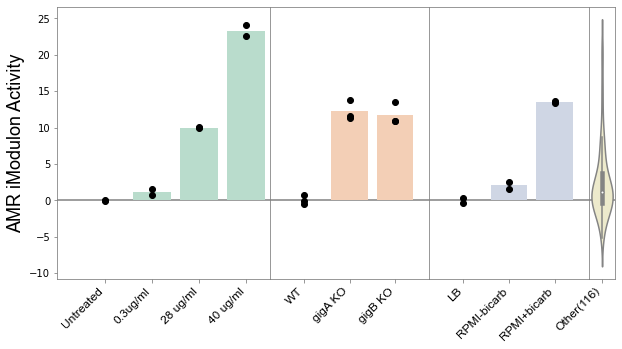

In [99]:
from pymodulon import io

import itertools as it
from collections import OrderedDict
%matplotlib inline

imod = 'AMR'

# should have the form {'project1': ['samp1', 'samp2'],
#                       'project2': ['samp1', 'samp2']}

samples = OrderedDict({'AB5075_AZI': ['AZI_000','AZI_003','AZI_028', 'AZI_040'], 
                      'AB5075_gigAB': ['WT', 'gigA', 'gigB'],
                      'AB5075_med': ['LB', 'RPMI+_-HCO3', 'RPMI+_pH7']})

# double check to make sure labels match the samples
labels = ["RPMI+bicarb", "RPMI-bicarb","LB", "gigB KO", "gigA KO", "WT", "40 ug/ml", "28 ug/ml", "0.3ug/ml", "Untreated"]
          
err = 'Number of samples does not match the number of labels'
assert(len(list(it.chain(*samples.values()))) == len(labels)), err



cmap = plt.cm.get_cmap("Pastel2", 8)
colors = cmap(np.arange(cmap.N))

def get_mean(group):
    return [ica_data.A.loc[imod, grp.index].mean() for idx, grp in group.groupby('condition')]

# change [10,5] to change the size and shape of the plot
width_spaces = [len(samples[i]) for i in samples] 
width_spaces.append(0.5)
fig, axes = plt.subplots(1, len(samples) + 1, figsize=[10,5], sharey=True,
                         gridspec_kw={'width_ratios': width_spaces})
plt.subplots_adjust(wspace=0, hspace=0)

used_index = []
for ax, prj, clr in zip(axes, samples, colors):
    cond = samples[prj]
    samps = ica_data.sample_table[(ica_data.sample_table.project == prj) &
                                 (ica_data.sample_table.condition.isin(cond))]
    used_index.extend(samps.index)
    bp = sns.barplot(x=np.arange(len(cond)), y=get_mean(samps), ax=ax, color=clr,
                    dodge=False)
   
    for xl, sgroup in zip(bp.get_xticks(), samps.groupby('condition')):
        sidx, sgrp = sgroup
        ax.scatter([xl] * len(sgrp), ica_data.A.loc[imod, sgrp.index], color='black',
                  zorder=10)
    new_width = 0.25 * len(cond)
    ax.hlines(0, 0 - new_width, len(cond), color='gray', zorder=-1)
    #ax.set_xlim(0 - new_width, len(cond) - new_width)
    ax.set_xlim(0 - new_width, len(cond) - new_width+0.5)
    ax.set_xticklabels([labels.pop() for i in range(len(cond))],
                       rotation=45, ha='right', fontname='Arial', fontsize=12)

rest = ica_data.A.loc[imod, [i for i in ica_data.A if i not in used_index]]
sns.violinplot(x=[1] * len(rest), y=rest, ax=axes[-1], color='#f2efc7')

#clear ticks
for a in axes:
    a.tick_params(color='gray')
    for spine in a.spines.values():
        spine.set_edgecolor('gray')
for a in axes[1:]:
    a.tick_params(left=False)

axes[-1].set_ylabel('')
axes[-1].hlines(0, -2, 2, color='gray', zorder=-1)
axes[-1].set_xlim(-0.5, 0.5)
axes[-1].set_xticklabels([f'Other({len(rest)})'], rotation=45, ha='right',
                         fontname='Arial', fontsize=12)

axes[0].set_ylabel(f'{imod} iModulon Activity', fontname='Arial', fontsize=18)

#plt.savefig("../figures/Figure6_AMRactivities.svg",transparent = True)

This data suggest that Azithromycin may induce the expression of this antibiotic resistance island. Bicarbonate, acting as a signal for host infiltration may play a role in the activation of this island. Lastly, gigAB knockouts increase the activity of the iModulon, suggesting that the GigA-GigB two component system may repress induced antibiotic resistance. 